# Vectorization of spec_calc: 

* And bringing things in accordance with my Personal Python Style Guide. 

TODO:

* Fix the interp functionality for B. Why does it call itself twice. Fix this. Also throw an error if it calls interp function but hasn't created the interpolation. 
* Change the rho center to be more consistent with other center names. 

In [2]:
%load_ext autoreload

In [92]:
%autoreload 2
# Standard:
import os
import json
import math

from scipy.interpolate import interp2d
from scipy.interpolate import griddata

import pandas as pd
pd.set_option('display.max_rows', 1000)
import numpy as np
import matplotlib.pyplot as plt

import spec_tools.spec_calc.spec_calc_with_rho_dependence as sc
import spec_tools.spec_calc.spec_calc_with_rho_dependence_vectorized as sc_vec
import spec_tools.spec_calc.power_calc as pc
from spec_tools.load_default_field_profiles import load_he6_trap

[autoreload of spec_tools.spec_calc.power_calc failed: Traceback (most recent call last):
  File "/home/drew/home/drew/Products/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/drew/home/drew/Products/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/drew/home/drew/Products/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/drew/home/drew/Products/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen import

In [47]:
# Load the input for the block: 
filename = "Hardware_trapped_events_df" 
hardware_df = pd.read_csv('{}/{}/{}.csv'.format(os.getcwd(),"Example_Simulation_dfs",filename),index_col=[0])
hardware_df["avg_cycl_freq"] = [19e9]*5
hardware_df["segment_power"] = [1e-15]*5

In [5]:
filepath = "{}/ConfigFiles/SimConfig_Example.json".format(os.getcwd())

with open(filepath,"r") as read_file:
    config_dict = json.load(read_file)
print(config_dict)

{'Configure_Simulation': {'check_for_existing_sim_data': True, 'simulation_results_dir': 'Example_Simulation_dfs', 'simulation_results_file_prefix': 'Not sure I need this'}, 'Physics': {'events_to_simulate': 5, 'monoenergetic': True, 'energy': 17800.0, 'spectrum_isotope': False, 'b_fierz': 0.002, 'weak_magnetism': True, 'min_rho': 0, 'max_rho': 0.00578, 'min_z': -0.005, 'max_z': 0.005, 'min_theta': 85, 'max_theta': 90}, 'Hardware': {'hardware_freqbw_max': 19300000000.0, 'hardware_freqbw_min': 17600000000.0, 'main_field': 0.689, 'trap_strength': 0.001, 'decay_cell_radius': 0.00578, 'base_num_sidebands': 7, 'sideband_tolerance': 0.99, 'standard_decay_cell_radius': True, 'standard_trap_geometry': True, 'calculate_axial_frequencies': True}, 'Kinematics': {'fixed_jump_num_size': True, 'jump_num': 3, 'jump_size': 14, 'DELETE_ABOVE': True, 'mean_track_length': 0.005, 'jump_size_eV': 14, 'jump_std_eV': 2, 'pitch_angle_costheta_std': 0.01, 'jump_num_max': 3}, 'BandBuilder': {'sideband_num': 2, 

In [6]:
# Load trap. 
main_field = 1
trap_strength = .001

# TODO: Make sure you can input whether or not for interp to run somewhere more intuitive. Right now it's just changing the default setting. 
trap_profile = load_he6_trap(main_field, trap_strength)
field_strength = lambda r,z : trap_profile.field_values((r,0,z))[2]

Optimization terminated successfully.
         Current function value: -1.000508
         Iterations: 42
         Function evaluations: 97
Trap width: (-0.04515689086914063,0.04515689086914063)
Maximum Field: 1.0005077212939244


In [7]:
trap_profile.initialize_field_strength_interp()

Time to initialize field_strength_interp =  115.99099504899999 



In [101]:
## Testing the vectorization of the spec_calc: 

# # Funtion 1: energy_to_freq: GOOD.
# print(help(sc_vec.energy_to_freq))
# print(sc_vec.energy_to_freq(hardware_df["energy"], main_field))
# print(sc.energy_to_freq(hardware_df["energy"][0], main_field))
# print("\n")

# # Function 2: random_beta_generator: GOOD.
# print(help(sc_vec.random_beta_generator))

# # # Function 3: theta_center: GOOD
# # print(help(sc_vec.theta_center))
# print(sc_vec.theta_center(hardware_df["initial_zpos"], hardware_df["rho_center"], hardware_df["initial_pitch_angle"], trap_profile))
# print(sc.theta_center(hardware_df["initial_zpos"].iloc[0], hardware_df["rho_center"].iloc[0], hardware_df["initial_pitch_angle"].iloc[0], trap_profile))
# print(hardware_df["center_theta"])
# print("\n")


# # Funtion 4: cyc_radius: GOOD
# print(sc_vec.cyc_radius(hardware_df["energy"]*100, main_field, hardware_df["center_theta"]))
# print(sc.cyc_radius(hardware_df["energy"][0]*100, main_field, hardware_df["center_theta"][0]))

# # Function 5: max_radius: GOOD
# print(sc_vec.max_radius(hardware_df["energy"], hardware_df["center_theta"], hardware_df["rho_center"], trap_profile))
# print(sc.max_radius(hardware_df["energy"][0], hardware_df["center_theta"][0], hardware_df["rho_center"][0], trap_profile))

# # Function 6: min_theta: GOOD
# print(sc_vec.min_theta(hardware_df["rho_center"],hardware_df["initial_zpos"], trap_profile))
# print(sc.min_theta(hardware_df["rho_center"][0],hardware_df["initial_zpos"][0], trap_profile))

# # Funcion 7: max_zpos: GOOD
# print(sc_vec.max_zpos(hardware_df["center_theta"],hardware_df["rho_center"], trap_profile))
# print(sc.max_zpos(hardware_df["center_theta"][1],hardware_df["rho_center"][1], trap_profile))
# hardware_df["zmax"] = sc_vec.max_zpos(hardware_df["center_theta"],hardware_df["rho_center"], trap_profile)

# # Function 8: mod_index: GOOD
# print(sc_vec.mod_index(hardware_df["avg_cycl_freq"],hardware_df["zmax"]))
# print(sc.mod_index_calc(hardware_df["avg_cycl_freq"][0],hardware_df["zmax"][0]))

# # Function 9: df_dt: GOOD
# print(sc_vec.df_dt(hardware_df["energy"],main_field,hardware_df["segment_power"]))
# print(sc.df_dt(hardware_df["energy"][0],main_field,hardware_df["segment_power"][0]))

# # Function 10: curr_pitch_angle GOOD
# print(sc_vec.curr_pitch_angle(hardware_df["rho_center"],hardware_df["zmax"]*0,hardware_df["center_theta"],trap_profile))
# print(sc.curr_pitch_angle(hardware_df["rho_center"][0],hardware_df["zmax"][0]*0,hardware_df["center_theta"][0],trap_profile))

# # Function 11: axial_freq: GOOD
# print(sc_vec.axial_freq(hardware_df["energy"], hardware_df["center_theta"], hardware_df["rho_center"], trap_profile))
# print(sc.axial_freq(hardware_df["energy"][0], hardware_df["center_theta"][0], hardware_df["rho_center"][0], trap_profile))

# # Function 12: axial_freq: GOOD
# print(sc_vec.axial_freq(hardware_df["energy"], hardware_df["center_theta"], hardware_df["rho_center"], trap_profile))
# print(sc.axial_freq(hardware_df["energy"][0], hardware_df["center_theta"][0], hardware_df["rho_center"][0], trap_profile))
# hardware_df["axial_freq"] = sc_vec.axial_freq(hardware_df["energy"], hardware_df["center_theta"], hardware_df["rho_center"], trap_profile)

# Function 13: avg_cyc_freq: GOOD
print(sc_vec.avg_cyc_freq(hardware_df["energy"], hardware_df["axial_freq"], hardware_df["center_theta"], hardware_df["rho_center"], trap_profile))
print(sc_vec.avg_cyc_freq(hardware_df["energy"][0], hardware_df["axial_freq"][0], hardware_df["center_theta"][0], hardware_df["rho_center"][0], trap_profile))
hardware_df["avg_cycl_freq"] = sc_vec.avg_cyc_freq(hardware_df["energy"], hardware_df["axial_freq"], hardware_df["center_theta"], hardware_df["rho_center"], trap_profile)

# Function 14: t: GOOD (But returning negative times! need to debug this)
print(sc_vec.t(hardware_df["energy"], hardware_df["initial_zpos"], hardware_df["initial_pitch_angle"], hardware_df["rho_center"], trap_profile))
print(sc_vec.t(hardware_df["energy"][4], hardware_df["initial_zpos"][4], hardware_df["initial_pitch_angle"][4], hardware_df["rho_center"][4],trap_profile))

[2.70273030e+10 2.70278893e+10 2.70222889e+10 2.70302738e+10
 2.70474307e+10]
27027303017.264404
[ 5.79252536e-10 -2.76224061e-09  2.05837926e-10  3.84401036e-09
 -1.19712752e-09]
-1.1971275235734352e-09


In [98]:
# Function 15: power calc: GOOD        
print(pc.power_calc(hardware_df["center_x"], hardware_df["center_y"], hardware_df["avg_cycl_freq"], main_field))
print(pc.power_calc(hardware_df["center_x"][2], hardware_df["center_y"][2], hardware_df["avg_cycl_freq"][2], main_field))


[7.89544640e-16 2.89085840e-15 1.30250263e-15 1.62978904e-15
 1.92886013e-15]
1.30250262775199e-15


In [83]:
# note that these dimensions are hardcoded so if the decay cell changes size this will be invalid.
waveguide_radius = 0.578e-2  # (m)
trap_zmax = 5.5e-2  # (m)

grid_edge_length = 1e-3 # (m), it was found that grid_edge_length = 5e-4 results in 1ppm agreement between field_stength and field_strength_interp

rho_array = np.arange(0, waveguide_radius, grid_edge_length)
z_array = np.arange(-trap_zmax, trap_zmax, grid_edge_length)

map_array = np.zeros((z_array.shape[0], rho_array.shape[0]))

B = lambda rho, z: trap_profile.field_strength(rho, z)
# start = time.process_time()
# your code here

for i, z in enumerate(z_array):
    for j, rho in enumerate(rho_array):
        map_array[i][j] = B(rho, z)

B_interp2d = interp2d(rho_array, z_array, map_array, kind="cubic")

In [84]:
B_griddata = griddata(rho_array, z_array, map_array, method="cubic")
# tot_time = time.process_time() - start
# print("Time to initialize field_strength_interp = ", tot_time, "\n")

In [91]:
# Making it vectorized. 
def B_interp(rho,z): 
    return B_interp2d(rho,z)[0]
B = np.vectorize(B_interp)

In [86]:
# WTF 
rho,z= hardware_df["rho_center"],hardware_df["initial_zpos"]
print(rho,z)

0    0.005088
1    0.000750
2    0.003971
3    0.003396
4    0.002889
Name: rho_center, dtype: float64 0    0.000943
1   -0.003179
2    0.000122
3    0.004950
4   -0.003166
Name: initial_zpos, dtype: float64


In [87]:
print(B_interp2d(rho,z))
print(B_griddata(rho,z))

[[0.99907054 0.99904868 0.99903948 0.99902694 0.99899854]
 [0.99907    0.99904808 0.99903885 0.99902628 0.9989978 ]
 [0.99899785 0.99896768 0.99895486 0.99893731 0.99889719]
 [0.99900443 0.99897503 0.99896255 0.99894546 0.9989064 ]
 [0.99916269 0.99915043 0.99914542 0.99913875 0.99912428]]


TypeError: 'numpy.ndarray' object is not callable

In [112]:

for i,(a,b) in enumerate(zip(rho,z)):
    print(a,b)
    print(B(a,b))
    print((B_interp(a,b)))
print((B(rho,z)))

0.005088332556639851 0.0009428792751457237
0.9989064035520396
0.9989064035520396
0.0007503790708391425 -0.003178728132951661
0.9990705402320195
0.9990705402320195
0.003971098548725978 0.00012192240240413347
0.9989373071044575
0.9989373071044575
0.0033955277030732435 0.004950078422668176
0.999145423235473
0.999145423235473
0.0028893601280307354 -0.0031663431805112165
0.9990480827710971
0.9990480827710971
[0.9989064  0.99907054 0.99893731 0.99914542 0.99904808]


# Axial Frequency Calculator Improvements: 

**Concept** 

* Using Alejandro and Kris's write-up to come up with a faster and hopefully more accurate axial frequency calculator. 

**Ideas**

* This could be a useful resource in determining how much the off axis variation matters: https://tiggerntatie.github.io/emagnet-py/offaxis/off_axis_loop.html


# Working towards recreating Figure 3.3 for our trap geometry: 

## Axial_Freq: (Fig 3.3b)

## Would be useful to plot our trap to compare qualitatively with Fig 2.13 in Esfahani's Thesis. 

* In Fig 2.13 they use a single coil 

![Conventions](Images/Proj8SingleCoilTrapProfile.png)

# Working on Improving spec_calc: 

Tasks: 

1. Implement rho dependence in all sc functions. 
2. Plot all relavant things to illustrate it's working and making sense. 
3. Improve the speed of the B(z) function



1. Implement rho dependence in all sc functions. 

* Step 1: Go through and make a list of the sc functions I use in the above simulations: 
    * sc.randdom_beta_generator()
    * sc.theta_center()
    * sc.cyc_radius()
    * sc.max_radius()
    * sc.avg_cycl_freq()
    * sc.axial_freq()
    * sc.max_zpos()
    * sc.mod_index_calc()
    * sc.df_dt()
    
* Step 2: Make a new file (spec_calc_with_rho_dependence.py) and take notes of what alterations were necessary. Include only what functions are necessary and if a function not in this list is called by one of the functions in the list note that. 
    * Alterations:
        * sc.randdom_beta_generator(): NO ALTERATIONS. 
        * sc.theta_center(): Added in rho dependence.
        * sc.cyc_radius(): Need to think about... This is an instantaneos field. 
        * sc.max_radius(): Added in a rho dependence which only effected magnetic field. 
        * sc.max_zpos(): Added in a rho dependence.
            * sc.min_theta: Added in a tho dependence. 
        * sc.mod_index_calc(): NO ALTERATIONS. But do need to alter avg_cycl_freq which is an input of this function. 
        * sc.df_dt(): NO ALTERATIONS. Probably fine to just use the main field here and not the average field. But be aware. 
        * sc.axial_freq(): Used the dt = dt/dz * dz method. 
            * sc.velocity(): Dropped "field" as an input because it wasn't being used. 
            * sc.curr_pitch_angle(): Added in a rho dependence.
        * sc.avg_cycl_freq(): Used the dt = dt/dz * dz method. 
            * sc.energy_to_freq(): NO ALTERATIONS. 
    * Notes: 
        * Need to be careful that rho is the center of the cycl orbit not initial_rho. Double check how you address this in the simulation. 
    

In [1]:
# Standard:
import os
import json
import math
import pandas as pd
pd.set_option('display.max_rows', 1000)
import numpy as np
import matplotlib.pyplot as plt

# Supress pd warnings: 
pd.options.mode.chained_assignment = None

# Kris's Library
import spec_tools.spec_calc.spec_calc_with_rho_dependence as sc_rho
import spec_tools.spec_calc.spec_calc as sc
import spec_tools.spec_calc.power_calc as pc
from spec_tools.load_default_field_profiles import load_he6_trap

%matplotlib inline
# mpld3.disable_notebook()
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.dpi'] = 150

In [2]:
## Testing the new sc with rho dependence 

# define trap
main_field = .7
trap_strength = 1e-3
trap_profile = load_he6_trap(main_field, trap_strength)

# define constants for plots
energy = 30e3
waveguide_radius = 0.578e-2


# # define arrays for plots

# rho_array = np.arange(0,waveguide_radius,1e-4)
# center_pitch_angle_array = np.arange(88,89.9,.5)


Time to initialize field_strength_interp =  101.707413102 

Time to initialize field_strength_interp =  107.65284221900001 

Optimization terminated successfully.
         Current function value: -0.700355
         Iterations: 42
         Function evaluations: 93
Trap width: (-0.04515688705444337,0.04515688705444337)
Maximum Field: 0.7003554049057471


# Field Dependence on rho: 

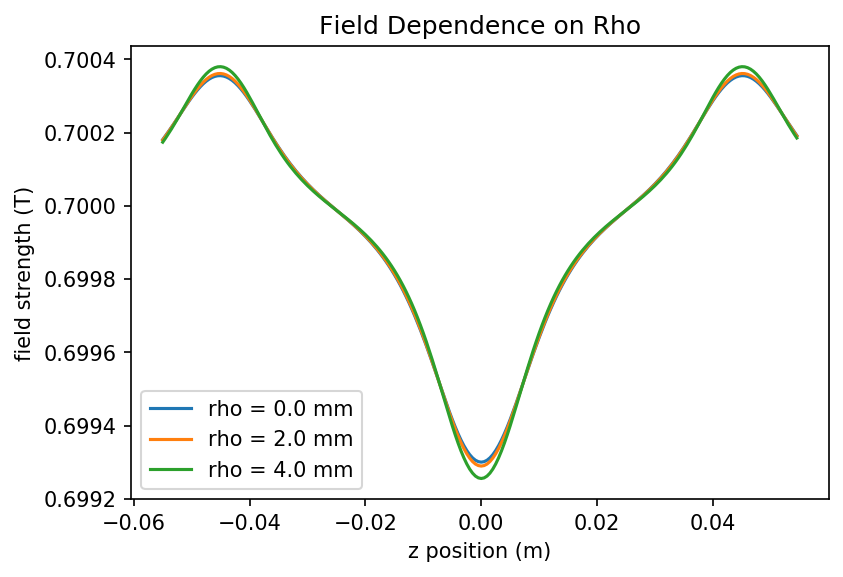

In [3]:
z_array = np.arange(-5.5e-2,5.5e-2,5e-4)
rho_field_array = np.arange(0,waveguide_radius-.001,2e-3)
field_strength_array = np.zeros((rho_field_array.shape[0],z_array.shape[0]))

for i,rho in enumerate(rho_field_array):
    for j,z in enumerate(z_array):
        field_strength_array[i][j] = trap_profile.field_strength_interp(rho,z)

fig1, ax1 = plt.subplots(figsize = (6,4))
    
for i, field_strength in enumerate(field_strength_array):
    
    ax1.plot(z_array,field_strength, label = 'rho = {} mm'.format(rho_field_array[i]*1000))
ax1.legend(loc='lower left')
ax1.set_xlabel('z position (m)')
ax1.set_ylabel('field strength (T)')
ax1.set_title('Field Dependence on Rho')
plt.show()


# Min Trapped Angle Dependence Rho

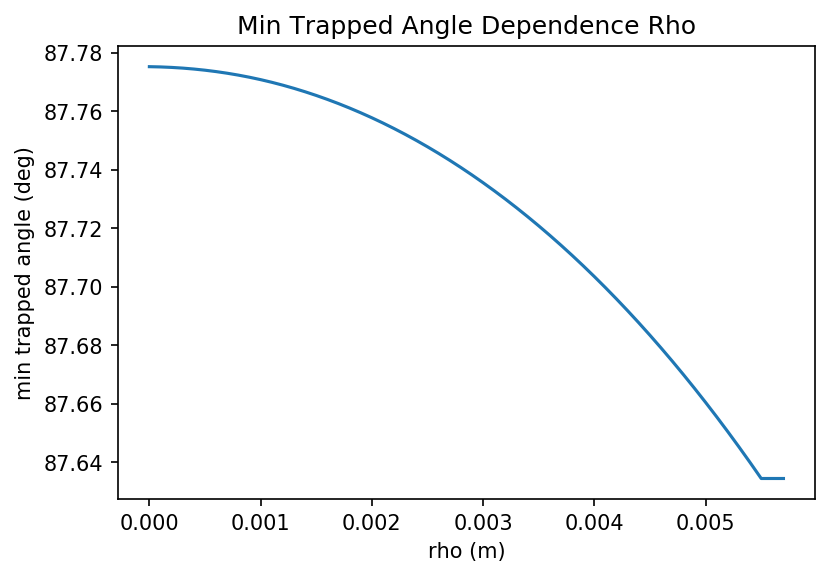

In [4]:
rho_array = np.arange(0,waveguide_radius,1e-4)
min_trapped_angle = np.zeros_like(rho_array)

for i,rho in enumerate(rho_array):
    min_trapped_angle[i] = sc_rho.min_theta(rho, 0, trap_profile)

fig1, ax1 = plt.subplots(figsize = (6,4))

ax1.plot(rho_array,min_trapped_angle)

ax1.set_xlabel('rho (m)')
ax1.set_ylabel('min trapped angle (deg)')
ax1.set_title('Min Trapped Angle Dependence Rho')
plt.show()

## Zmax vs Center Pitch Angle vs Rho

In [5]:
rho_array = np.arange(0,waveguide_radius-.001,2e-3)
center_pitch_angle_array = np.arange(88,90,.1)
zmax_array = np.zeros((rho_array.shape[0],center_pitch_angle_array.shape[0]))

for i,rho in enumerate(rho_array):
    for j,center_pitch_angle in enumerate(center_pitch_angle_array):
        zmax_array[i][j] = sc_rho.max_zpos(center_pitch_angle,rho, trap_profile,debug=False)

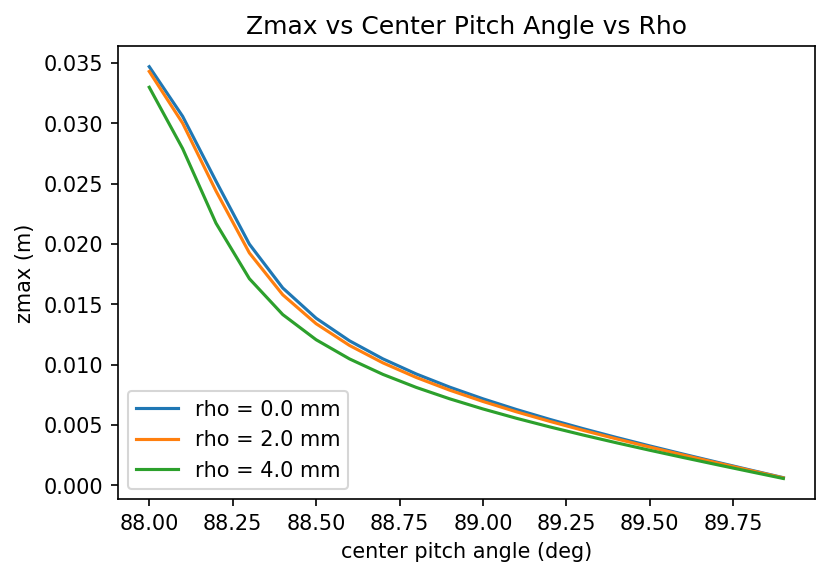

In [6]:
fig1, ax1 = plt.subplots(figsize = (6,4))
    
for i, zmax in enumerate(zmax_array):
    
    ax1.plot(center_pitch_angle_array,zmax, label = 'rho = {} mm'.format(rho_array[i]*1000))
ax1.legend(loc='lower left')
ax1.set_xlabel('center pitch angle (deg)')
ax1.set_ylabel('zmax (m)')
ax1.set_title('Zmax vs Center Pitch Angle vs Rho')
plt.show()

## Axial Freq vs Center Pitch Angle vs Rho

In [7]:
rho_array = np.arange(0,waveguide_radius-.001,2e-3)
center_pitch_angle_array = np.arange(88,90,.1)
axial_freq_array = np.zeros((rho_array.shape[0],center_pitch_angle_array.shape[0]))

for i,rho in enumerate(rho_array):
    for j,center_pitch_angle in enumerate(center_pitch_angle_array):
        axial_freq_array[i][j] = sc_rho.axial_freq(energy,center_pitch_angle,rho, trap_profile)

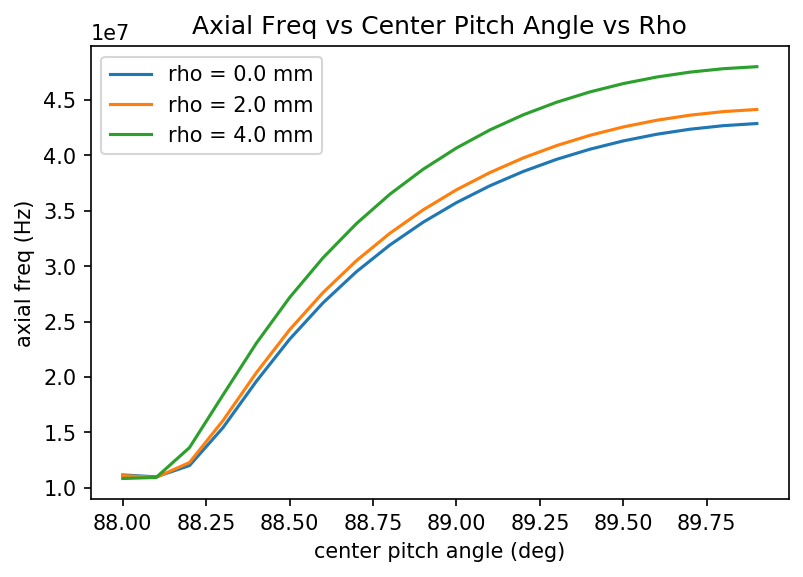

In [8]:
fig1, ax1 = plt.subplots(figsize = (6,4))
    
for i, axial_freq in enumerate(axial_freq_array):
    
    ax1.plot(center_pitch_angle_array, axial_freq, label = 'rho = {} mm'.format(rho_array[i]*1000))
ax1.legend(loc='upper left')
ax1.set_xlabel('center pitch angle (deg)')
ax1.set_ylabel('axial freq (Hz)')
ax1.set_title('Axial Freq vs Center Pitch Angle vs Rho')
plt.show()

## Avg Cycl Freq vs Center Pitch Angle vs Rho

In [9]:
rho_array = np.arange(0,waveguide_radius-.001,2e-3)
center_pitch_angle_array = np.arange(88,90,.1)
avg_cyc_freq_array = np.zeros((rho_array.shape[0],center_pitch_angle_array.shape[0]))

for i,rho in enumerate(rho_array):
    for j,center_pitch_angle in enumerate(center_pitch_angle_array):
        avg_cyc_freq_array[i][j] = sc_rho.avg_cyc_freq(energy, axial_freq_array[i][j], center_pitch_angle, rho, trap_profile)

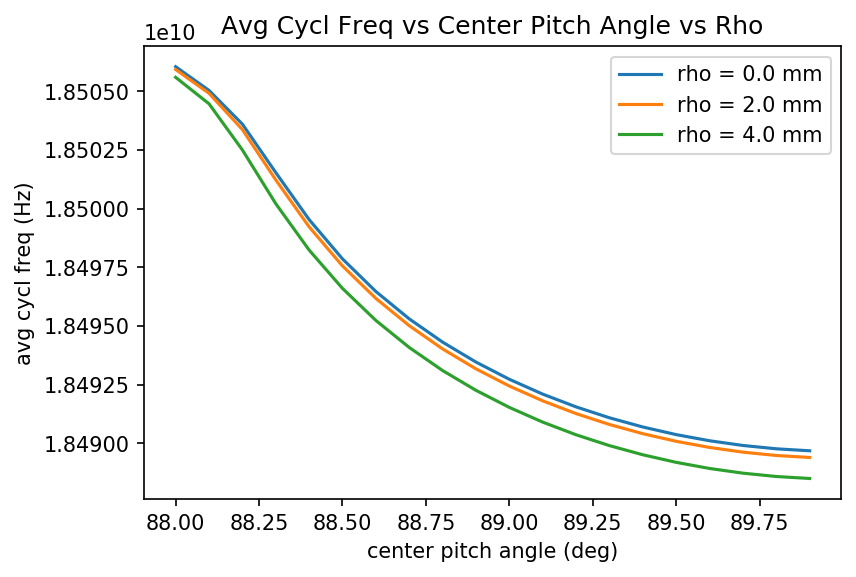

In [10]:
fig1, ax1 = plt.subplots(figsize = (6,4))
    
for i, avg_cyc_freq in enumerate(avg_cyc_freq_array):
    
    ax1.plot(center_pitch_angle_array, avg_cyc_freq, label = 'rho = {} mm'.format(rho_array[i]*1000))
ax1.legend(loc='upper right')
ax1.set_xlabel('center pitch angle (deg)')
ax1.set_ylabel('avg cycl freq (Hz)')
ax1.set_title('Avg Cycl Freq vs Center Pitch Angle vs Rho')
plt.show()

## t(z) vs z vs center pitch angle (@rho = 0): 


* Making better sense now that it's with jagged arrays.  

In [57]:
rho = 0.000
z_arrays = []
t_arrays = [] 

# zmax = sc_rho.max_zpos(center_pitch_angle,rho, trap_profile,debug=False)
min_pitch = sc_rho.min_theta(rho, 0, trap_profile)
center_pitch_angle_array = np.arange(min_pitch,90,.25)

for i, center_pitch_angle in enumerate(center_pitch_angle_array): 
    zmax = sc_rho.max_zpos(center_pitch_angle,rho, trap_profile,debug=False)
    z_array = np.arange(0,zmax,1e-4)
    t_array = np.zeros_like(z_array)
    
    for j,z in enumerate(z_array):
        t_array[j] = sc_rho.t(energy, z, center_pitch_angle, rho, trap_profile)
    z_arrays.append(z_array)
    t_arrays.append(t_array)

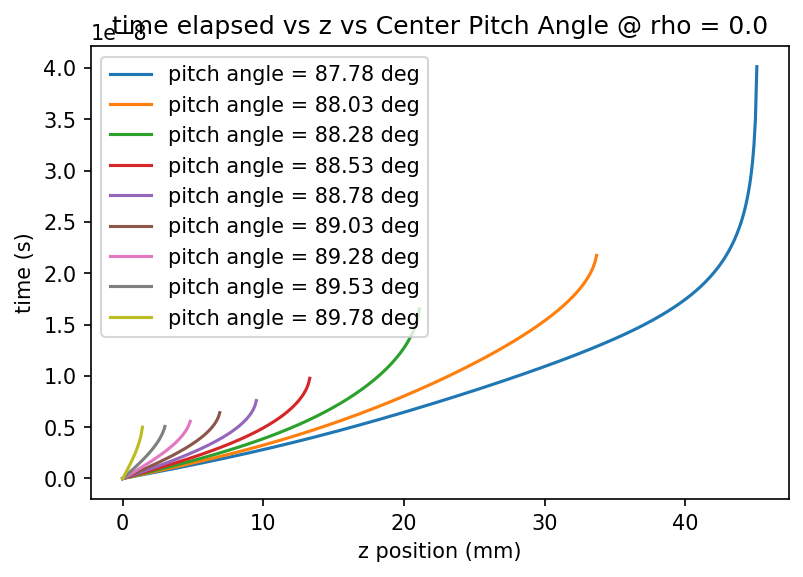

In [58]:
# print(z_arrays)
# print(t_array)
fig1, ax1 = plt.subplots(figsize = (6,4))
    
for i, (z,t)  in enumerate(zip(z_arrays,t_arrays)):
    ax1.plot(z*1000, t, label = 'pitch angle = {} deg'.format(np.around(center_pitch_angle_array[i],2)))
    
ax1.legend(loc='upper left')
ax1.set_xlabel('z position (mm)')
ax1.set_ylabel('time (s)')
ax1.set_title('time elapsed vs z vs Center Pitch Angle @ rho = {}'.format(rho))
plt.show()

# Need to now improve the speed of these functions. (Improving B-field strength method speed)

* I think the way to do this is to make the field reference a field map that get's written to a file and then create a 2D interpolation of the field that gets called each time you want the field value. First test to see how well this works before writing to a file and figuring out where this method should live. 

Mini Goals: 

* Have something that works faster at least partially working by our Friday check-in @ 2pm. 

Steps: 

* As a first step, time how long each call to the field takes. 
* Then get a very rough (not many points) interpolation working and see how long that takes to call. 
* See if you can get away with not needing to write a file to disk. This makes it much less user freindly. If the trap_profile takes some time to load then so be it. 

# OLD and MAYBE USELESS

# OLD (OR NOW REFLECTED IN sc)

# Using Ali's Thesis Eq. 3.23 to create a new axial_freq formula: 

Summarizing my findings thus far:

* The formulas (Eq 3.23 and 3.10) listed in Ali's thesis don't account for relativity. They use the classical relationships between momentum and energy. This causes issues. 

In [7]:
# Standard:
import os
import json
import math
import pandas as pd
pd.set_option('display.max_rows', 1000)
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
# Supress pd warnings: 
pd.options.mode.chained_assignment = None

# Kris's Library
import spec_tools.spec_calc.spec_calc as sc
import spec_tools.spec_calc.power_calc as pc
from spec_tools.load_default_field_profiles import load_he6_trap



In [20]:
## Testing Ali's Thesis Eq. 3.23 method (Without alterations): 

# fixed parameters: 
me = 5.10998950e5 # Electron rest mass, in eV
m = 9.1093837015e-31 # Electron rest mass, in kg
c = 299792458 # Speed of light in vacuum, in m/s
JeV = 6.241509074e18 # Joule-ev conversion

# Define trap and other parameters: 
main_field = .7
trap_strength = 3e-3
trap_profile = load_he6_trap(main_field, trap_strength)

center_pitch_angle = 88.5
KE = 60e4

Optimization terminated successfully.
         Current function value: -0.701066
         Iterations: 42
         Function evaluations: 92
Trap width: (-0.04515688705444337,0.04515688705444337)
Maximum Field: 0.7010662147172413


In [21]:
# Step 1: Find zmax
zmax = sc.max_zpos(center_pitch_angle,trap_profile,debug=True)
print("zmax: ",zmax)

Final field greater than max allowed field by:  7.692624315325247e-12
Bmax reached:  0.6983785518192905
zlength:  0.005996618928590863
zmax:  0.005996618928590863


In [22]:
# Step 2: Find mu and verify it's a constant of the motion: 

Bmax = trap_profile.field_strength(0,zmax)
Bmin = trap_profile.field_strength(0,0)
# print(Bmax, Bmin)

p_squared = lambda KE : (((KE/JeV) + m*c**2)/c)**2 - m**2*c**2 

mu_check = 1/2*p_squared(KE)/m*(np.sin(center_pitch_angle*math.pi/180)**2/Bmin)
mu = 1/2*p_squared(KE)/m*(1/Bmax)

print("consistency check (is mu actually a constant of the motion?): ",mu_check, mu, "\n")
print("This is over the kinetic energy. This is the root of the problem: ", mu*Bmin*JeV, "eV", "\n")
print(mu*Bmax*JeV, mu*Bmin*JeV, "\n")

consistency check (is mu actually a constant of the motion?):  2.1845955025863978e-13 2.1845955025623343e-13 

This is over the kinetic energy. This is the root of the problem:  951598.699462606 eV 

952251.2130693009 951598.699462606 



It makes sense that this doesn't work because p^2/2m doesn't hold relativistically. You can't just solve this with a gamma thrown in or something 

## Implimenting 2 changes: 

1. mu = KE sin^2(theta)/B
    * This forces the energy lost to the magnetic moment to make sense.     
2. Also need to correct for using the relationship 1/2mv^2 = KE in the formula. 
    * Here I use E_tot = KE + mc^2 = gamma m c^2

In [23]:
# fixing the formula for v_z and accounting for relativity: 

# First just creating a formula for v as a function of KE: 
v = lambda KE: c*(np.sqrt(1-(KE/me+1)**(-2))) # KE in eV


mu = KE/JeV*(1/Bmax)
v_z = lambda z: c*(np.sqrt(1-((KE-mu*trap_profile.field_strength(0,z)*JeV)/me+1)**(-2))) # KE in eV
integrand = lambda z: (v_z(z))**-1 # KE in eV

axial_freq_ali = (2/math.pi*integrate.quad(integrand, 0, zmax)[0])**-1

axial_freq_kris = sc.axial_freq(KE, center_pitch_angle, trap_profile)

Calculating axial frequency...


In [24]:
print(axial_freq_ali,  axial_freq_kris)
print(axial_freq_ali/axial_freq_kris)

1937373276.684001 177304964.53900144
10.926785280498114


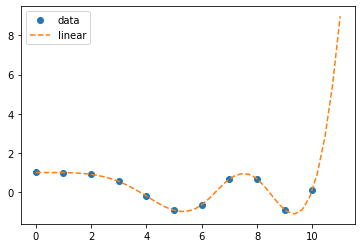

In [7]:
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic', fill_value="extrapolate")
xnew = np.linspace(0, 11, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [5]:
from scipy.interpolate import interp1d
x = np.array(A[1]["center_theta_array"])
y = np.array(A[1]["{}".format(trap_strength)])
print(x,y)
f = interp1d(x, y, fill_value = 'extrapolate')
f2 = interp1d(x, y, kind='cubic', fill_value = 'extrapolate')
xnew = np.linspace(x[0], 90, num=41, endpoint=True)

[88.27524558 88.37524558 88.47524558 88.57524558 88.67524558 88.77524558
 88.87524558 88.97524558 89.07524558 89.17524558 89.27524558 89.37524558
 89.47524558 89.57524558 89.67524558 89.77524558 89.87524558] [14415503.23945299 18579459.14451648 22514165.91319549 25925783.81422358
 28845843.19861171 31346193.63170574 33491098.735775   35332143.34674267
 36910229.89167339 38257537.50003615 39399737.12495223 40357535.47830825
 41147183.47529065 41781845.28684119 42271715.82585599 42624219.76366192
 42844681.17560122]


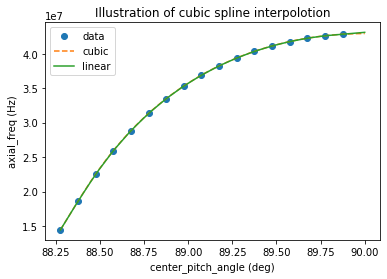

In [6]:
import matplotlib.pyplot as plt
plt.plot(x, y,  'o', xnew, f2(xnew), '--')
plt.plot(xnew, f(xnew),  '-')
plt.title("Illustration of cubic spline interpolotion")
plt.ylabel('axial_freq (Hz)', fontsize = 10)
plt.xlabel('center_pitch_angle (deg)', fontsize = 10)
plt.legend(['data',  'cubic','linear'], loc='best')
plt.show()

In [8]:
# f2(center_pitch_angle)
energy = 30.0e4
print(sc.axial_freq(energy, 89.5, trap_profile))
print(sc.axial_freq_P_over_E(energy, 89.5, trap_profile, trap_strength = .001)[0])

Calculating axial frequency...
97800658.78523982
Calculating axial frequency using P_over_E lookup_table...
The lookup_table directory exists.
File exists.
center_theta_array:  [88.27524558 88.37524558 88.47524558 88.57524558 88.67524558 88.77524558
 88.87524558 88.97524558 89.07524558 89.17524558 89.27524558 89.37524558
 89.47524558 89.57524558 89.67524558 89.77524558 89.87524558]
[88.27524558 88.37524558 88.47524558 88.57524558 88.67524558 88.77524558
 88.87524558 88.97524558 89.07524558 89.17524558 89.27524558 89.37524558
 89.47524558 89.57524558 89.67524558 89.77524558 89.87524558] [14415503.23945299 18579459.14451648 22514165.91319549 25925783.81422358
 28845843.19861171 31346193.63170574 33491098.735775   35332143.34674267
 36910229.89167339 38257537.50003615 39399737.12495223 40357535.47830825
 41147183.47529065 41781845.28684119 42271715.82585599 42624219.76366192
 42844681.17560122]
97707151.29608703


In [11]:
# f2(center_pitch_angle)
print(sc.axial_freq(energy, 89.99999, trap_profile))

Calculating axial frequency...
ends with pitch angle 90: 89.99999  zpos:  6.344264660956159e-08
133800743.93165213


In [14]:
np.arange(90,np87.75,.5)

array([], dtype=float64)

In [10]:
# Define trap 1: 
main_field_1 = 70
trap_strength_1 = 1e-3
trap_profile_1 = load_he6_trap(main_field_1, trap_strength_1)

# Define trap 2: 
main_field_2 = 2
trap_strength_2 = 1e-3
trap_profile_2 = load_he6_trap(main_field_2, trap_strength_2)

Optimization terminated successfully.
         Current function value: -70.035540
         Iterations: 42
         Function evaluations: 97
Trap width: (-0.04515689086914063,0.04515689086914063)
Maximum Field: 70.0355404905747
Optimization terminated successfully.
         Current function value: -2.001015
         Iterations: 42
         Function evaluations: 97
Trap width: (-0.04515689086914063,0.04515689086914063)
Maximum Field: 2.001015442587849


In [11]:
center_pitch_angle = 88
energy_1 = 18e5

min_theta_1 = sc.min_theta(0,trap_profile_1)
min_theta_2 = sc.min_theta(0,trap_profile_2)

print(min_theta_1,min_theta_2)

87.7752455776121 87.7752455776121


In [4]:
energy_1_axial_freq = sc.axial_freq(energy_1, center_pitch_angle, trap_profile_1)


energy_2 = energy_1


energy_2_axial_freq = sc.axial_freq(energy_2, center_pitch_angle,trap_profile_2)

Optimization terminated successfully.
         Current function value: -70.035540
         Iterations: 42
         Function evaluations: 97
Trap width: (-0.04515689086914063,0.04515689086914063)
Maximum Field: 70.0355404905747
Calculating axial frequency...
Optimization terminated successfully.
         Current function value: -2.001026
         Iterations: 42
         Function evaluations: 97
Trap width: (-0.04515689086914063,0.04515689086914063)
Maximum Field: 2.001025597013727
Calculating axial frequency...


In [30]:
## First see if the scaling goes as p/E: 

me = 5.10998950e5 # Electron rest mass, in eV
m = 9.1093837015e-31 # Electron rest mass, in kg
c = 299792458 # Speed of light in vacuum, in m/s
JeV = 6.241509074e18 # Joule-ev conversion

p = lambda E : np.sqrt(E**2 - (me)**2)
print(p(17.8e3+me))


E_1 = energy_1 + me
p_over_E_1 = p(E_1)/E_1

E_2 = energy_2 + me
p_over_E_2 = p(E_2)/E_2

print(p_over_E_1/p_over_E_2)
print(energy_1_axial_freq/energy_2_axial_freq)

print(energy_1_axial_freq*p_over_E_2/p_over_E_1)
print(energy_2_axial_freq)

136045.5902262178
0.9789122656449835
0.9763505852679877
33866309.545056246
33955165.59933825


In [15]:
# Define trap
main_field = .8
trap_strength = 1.0e-3
trap_profile = load_he6_trap(main_field, trap_strength)

energy = 36e3
center_pitch_angle = 89

method_1_axial_freq = sc.axial_freq(energy, center_pitch_angle,trap_profile)
method_2_axial_freq = sc.axial_freq_new(energy, center_pitch_angle,trap_profile)

print(method_1_axial_freq)
print(method_2_axial_freq)

Optimization terminated successfully.
         Current function value: -0.800406
         Iterations: 42
         Function evaluations: 95
Trap width: (-0.04515688705444337,0.04515688705444337)
Maximum Field: 0.8004061770351396
Calculating axial frequency...
38840502.25430023
38069783.37262035


In [49]:
# load trapping field 
main_field = 1
trap_strength = 1.0e-3
trap_profile = load_he6_trap(main_field, trap_strength)
field_strength = lambda r,z : trap_profile.field_values((r,0,z))[2]

# make list of radii 
r = np.arange(0,.01,.001)
field_strengths = []

# fill in field values as a function of radii for z = 0
z = 0 
for radius in r: 
    field_strengths.append(field_strength(radius,z))
field_strengths = np.array(field_strengths)  

Optimization terminated successfully.
         Current function value: -1.000508
         Iterations: 42
         Function evaluations: 97
Trap width: (-0.04515689086914063,0.04515689086914063)
Maximum Field: 1.0005077212939244


In [51]:
trap_profile.trap_strength

AttributeError: 'Trap_profile' object has no attribute 'trap_strength'

In [50]:
%matplotlib qt


plt.figure(1)
# plt.hist(df["segment_length"], bins = 100)

plt.ylabel('B (T)', fontsize = 10)
plt.xlabel('Rho (m)', fontsize = 10)
plt.title("Field Strength vs Rho")

plt.plot(r, field_strengths)
plt.show()

In [13]:
# Standard:
import os
import json
import math
import pandas as pd
pd.set_option('display.max_rows', 1000)
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d

# Supress pd warnings: 
pd.options.mode.chained_assignment = None

# spec_tools library
import spec_tools.spec_calc.spec_calc_with_rho_dependence as sc_rho
import spec_tools.spec_calc.spec_calc as sc
import spec_tools.spec_calc.power_calc as pc
from spec_tools.load_default_field_profiles import load_he6_trap

%matplotlib inline
# mpld3.disable_notebook()
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.dpi'] = 150

In [122]:
## Testing the new sc with rho dependence 

# define trap
main_field = 7
trap_strength = 10e-3
trap_profile = load_he6_trap(main_field, trap_strength)

waveguide_radius = 0.578e-2 # (m)
trap_zmax = 5.5e-2 # (m)

grid_edge_length = 5e-4 # (m)

rho_array = np.arange(0, waveguide_radius, grid_edge_length)
z_array = np.arange(-trap_zmax,trap_zmax,grid_edge_length)

map_array = np.zeros((z_array.shape[0],rho_array.shape[0]))
print(rho_array.shape)
print(z_array.shape)
print(map_array.shape)
print(map_array.size)

Optimization terminated successfully.
         Current function value: -7.035540
         Iterations: 42
         Function evaluations: 91
Trap width: (-0.045156887531280526,0.045156887531280526)
Maximum Field: 7.035540490574711
(12,)
(220,)
(220, 12)
2640


In [123]:
import time

B = lambda rho,z : trap_profile.field_strength(rho, z)
start = time.process_time()
# your code here    

for i,z in enumerate(z_array):
    for j,rho in enumerate(rho_array):
        map_array[i][j] = B(rho,z)
        
tot_time = time.process_time() - start 
time_per_call_original = tot_time/map_array.size
print("time per call (originally) = ", time_per_call_original)
# print(map_array)

time per call (originally) =  0.0422290685685606


In [124]:
# Now try the interpoloation: 

# Start with 1d interp:
# B_rhozero_interp1d = interp1d(z_array, map_array[:0], kind='cubic', fill_value = 'extrapolate')

# Now do 2d interp: 
B_interp2d = interp2d(rho_array,z_array, map_array, kind='cubic') # the 2d interpolation does automatic extrapolation


In [125]:
print(B_interp2d(.001, 0.005)[0])
print(B(0.001,0.005))

6.941547770153707
6.941547770153707


## how fast is it? 

In [128]:
# make a grid with half the edge length: (for meaninful comparison)
test_grid_num = 10

rho_array = np.random.uniform(0, waveguide_radius, test_grid_num)
z_array = np.random.uniform(-trap_zmax,trap_zmax,test_grid_num)

map_array_original = np.zeros((z_array.shape[0],rho_array.shape[0]))
map_array_interp2d = np.zeros_like(map_array_original)

In [129]:
# Retest the original with fewer points: 

start = time.process_time()
# your code here    

for i,z in enumerate(z_array):
    for j,rho in enumerate(rho_array):
        map_array_original[i][j] = B(rho,z)
        
tot_time = time.process_time() - start 
time_per_call_original = tot_time/map_array_original.size
print("time per call = ", time_per_call_original)

time per call =  0.04844266732000051


In [130]:
# Test the Interp2d: 

start = time.process_time()
# your code here    

for i,z in enumerate(z_array):
    for j,rho in enumerate(rho_array):
        map_array_interp2d[i][j] = B_interp2d(rho,z)
        
tot_time = time.process_time() - start 
time_per_call_interp2d = tot_time/map_array_interp2d.size
print("time per call = ", time_per_call_interp2d)

print("improvement factor", time_per_call_original/time_per_call_interp2d)
        

time per call =  0.0002394500600007632
improvement factor 202.3080191328668


## how good is it? 

In [131]:
absolute_tolerance = 1e-4
allclose = np.allclose(map_array_interp2d-map_array_original, np.zeros_like(map_array_original), atol=absolute_tolerance)
print("All field values within {} Tesla: {}".format(absolute_tolerance, allclose) )

All field values within 0.0001 Tesla: True


In [132]:
print("Relative Difference Mean: ",((map_array_interp2d-map_array_original)/map_array_original).mean())
print("Relative Difference Std: ",((map_array_interp2d-map_array_original)/map_array_original).std())

Relative Difference Mean:  4.683071600495109e-10
Relative Difference Std:  9.732442697324441e-09


## Conclusions: 

Initial Tests: 
* With a grid length edge of 5e-4 we get relative agreement between the field strength and the interpolated field of less than 1 ppm.
    * I've verified this at .7 T and 7 T. As well as 1e-3 and 10e-3 relative strengths. It actually works even better for deeper traps. 

* The original function took roughly .05 s per call. The new function takes roughly 5e-5 s (10^3 less time per call). 
    * So you need to do a 2640 x .05 = 2 mins calculation up front. But ideally it saves you a lot of time. 

Implementing it within the spec tools framework: 

* Redo all above plots and make sure they are fast. 
* Going to have the field 
* A python note: "class Trap_profile(field_profile)" means that the trap_profile class inherits from the field_profile class! Should read more about. 
* Ok going to have an initialize_field_strength_fast() that gets called in the init and then a funcion field_strength_fast() that can be called. 

In [1]:
# Example of output. Can be converted to csv easily if necessary. 

TrackSet = {'StartTime': [.01, .02, .03, .04, .02, .03, .04, .02, .03, .04, .02, .03, .04],
            'EndTime' : [.02, .03, .04, .05, .02, .03, .04, .02, .03, .04, .02, .03, .04],
            'StartFrequency': [18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9], 
            'EndFrequency':[18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9, 18e9],
            'Slope': [1e9, 1e9, 1e9, 1e9, 1e9, 1e9, 1e9, 1e9, 1e9, 1e9, 1e9, 1e9, 1e9],
            'TrackPower_Watts': [1e-15, 1e-15, 1e-15, 1e-15, 1e-15, 1e-15, 1e-15, 1e-15, 1e-15, 1e-15, 1e-15, 1e-15, 1e-15],
            'EventID': [0,0,0,0,0,1,1,1,1,1,1,1,2],
            'SegmentNum': [0,1,1,1,2,0,0,0,0,0,1,2,0],
            'BandNum': [0,-1,0,1,0,-2,-1,0,1,2,0,0,0],
            'ConfigFile':["filename"]*13
           }

# Create DataFrame
df = pd.DataFrame(TrackSet)
 
# Print the output.
df

NameError: name 'pd' is not defined

In [5]:
class Kinematics:
    
    """
    An object containing methods to deal with scattering. 
    
    "Kinematics" : {
        "jump_num" : 5, 
        "jump_size" : 14,
    },
    """

    def __init__(self, config_dict):
        
        self.fixed_jump_num_size = config_dict["Kinematics"]["fixed_jump_num_size"]
        self.mean_track_length = config_dict["Kinematics"]["mean_track_length"]
        self.jump_num = config_dict["Kinematics"]["jump_num"]
        self.jump_size = config_dict["Kinematics"]["jump_size"]
        
        # Need this information from "Hardware" as well. 
        self.trap_strength = config_dict["Hardware"]["trap_strength"]
        self.main_field = config_dict["Hardware"]["main_field"]
        self.decay_cell_radius = config_dict["Hardware"]["decay_cell_radius"]
        
        
        # loading trap profile
        # Need to figure out how this will be configurable. For now it is fixed to the default trap profile. 
        self.trap_profile = load_he6_trap(self.main_field, self.trap_strength)
        self.field_strength = lambda r,z : self.trap_profile.field_values((r,0,z))[2]


    def scatter(self, trapped_event_df):
        
        if self.fixed_jump_num_size == True: 
            
            segments_per_event = self.jump_num+1
            
            trapped_unscattered_df = trapped_event_df.copy()
            
            segments_df = pd.DataFrame(np.repeat(trapped_unscattered_df.values,segments_per_event,axis=0))
            segments_df.columns = trapped_unscattered_df.columns
            
            # conversion factors 
            watts_to_eV = 1/(1.60217733e-19) # 1 Watt*s to eV converstion factor. 
        
            for event_index, event in trapped_unscattered_df.iterrows():
                
                # Warning:
                if event_index != event["event_num"]: print("df indexing is off. event_index doesn't match event_num.")
                    
                event_num = int(event["event_num"])
#                 print("Scattering event_num: ", event_num)

                # sample exponential to find track lengths. 
                segment_lengths = np.random.exponential(self.mean_track_length,segments_per_event)
                
                for segment_num in range(0,segments_per_event):
                    
                    segments_df_index = int(event_num*(segments_per_event)+segment_num)
                    segments_df["segment_num"][segments_df_index] = segment_num
                    segments_df["segment_length"][segments_df_index] = segment_lengths[segment_num]
                    
                    if segment_num == 0:
                        
                        # energy is unchanged for segment 0. 
                        # may want to refer to this as initial_avg_cycl_freq at some point. 
                        avg_cycl_freq = sc.avg_cyc_freq(segments_df["energy"][segments_df_index],segments_df["center_theta"][segments_df_index],self.trap_profile)
                        print(avg_cycl_freq)
                        # using the approximation that the radiated power doesn't change as the energy changes due to scattering. Inspect this later. Should be ok for now. 
                        segment_radiated_power = pc.power_calc(segments_df["center_x"][segments_df_index],segments_df["center_y"][segments_df_index],avg_cycl_freq,self.main_field, self.decay_cell_radius)*2

                    else: 
                        # Need to verify this is exactly right... 
                        segments_df["energy"][segments_df_index] = event["energy"]-segment_lengths[:segment_num].sum()*segment_radiated_power*watts_to_eV - segment_num*self.jump_size 
                        print(segment_lengths[:segment_num].sum()*segment_radiated_power*watts_to_eV)
                        print("energy",segments_df["energy"][segments_df_index])
                        avg_cycl_freq = sc.avg_cyc_freq(segments_df["energy"][segments_df_index],segments_df["center_theta"][segments_df_index],self.trap_profile)
                    
                    # now calculate all other important variables based on the above
                    axial_freq = sc.axial_freq(segments_df["energy"][segments_df_index],segments_df["center_theta"][segments_df_index],self.trap_profile)
                    zmax = sc.max_zpos(segments_df["center_theta"][segments_df_index],self.trap_profile)
                    mod_index = sc.mod_index_calc(avg_cycl_freq, zmax)
                    # Note that I am using the main field, not the average field as I probably should here. Think about how to address this. It would be good to have b_avg in general. 
                    segment_power = segment_radiated_power/2
                    # Again should use b_avg here. 
                    slope = sc.df_dt(segments_df["energy"][segments_df_index],self.main_field,segment_radiated_power, time=0)
                    
                    # fill in segment_df
                    segments_df["avg_cycl_freq"][segments_df_index] = avg_cycl_freq
                    segments_df["axial_freq"][segments_df_index] = axial_freq
                    segments_df["zmax"][segments_df_index] = zmax
                    segments_df["mod_index"][segments_df_index] = mod_index
                    segments_df["segment_power"][segments_df_index] = segment_power
                    segments_df["slope"][segments_df_index] = slope


            segments_df = segments_df.sort_values(by = ["event_num", "segment_num"])
            segments_df = segments_df.reset_index(drop=True)

            return segments_df
                
        

In [17]:
condition1 = True
condition2 = False
if not condition1 or condition2: # Seems redundant to have this and the while loop...
    print("hi")

## Testing the new Kinematics Block: 

In [121]:
hardware = Hardware(config_dict)
simulation = Configure_Simulation(config_dict)

Optimization terminated successfully.
         Current function value: -0.689350
         Iterations: 42
         Function evaluations: 95
Trap width: (-0.04515688705444337,0.04515688705444337)
Maximum Field: 0.6893498199715139
Time to initialize field_strength_interp =  24.887342461000003 



In [215]:
# Test the block: 
kinematics = Kinematics(config_dict, hardware)

In [195]:
hardware_df = pd.read_csv('{}/{}/{}.csv'.format(os.getcwd(),"Example_Simulation_dfs",filename),index_col=[0])

In [196]:
#First need to fill in the basic hardware_df: 
hardware_df

,energy,initial_rho_pos,initial_phi_pos,initial_zpos,initial_pitch_angle,initial_phi_dir,center_theta,initial_field,initial_radius,center_x,center_y,rho_center,trapped_initial_pitch_angle,max_radius,avg_cycl_freq,zmax,axial_freq,mod_index,segment_power,slope,segment_length,band_power,band_num,segment_num,event_num
0,17800.0,0.004664,341.127042,-0.003873,88.355727,319.166822,88.215151,0.688347,0.000659,0.005094,0.000499,0.005119,87.765838,0.000659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0
1,17800.0,0.004873,73.433485,-0.003256,87.859874,21.259649,87.783034,0.688316,0.000659,0.004634,0.000614,0.004675,87.748883,0.000659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,1
2,17800.0,0.003588,87.942765,0.004428,89.692943,147.597878,89.223204,0.688386,0.000659,0.003235,-0.000557,0.003283,87.842418,0.000659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,2
3,17800.0,0.003208,306.056006,-0.003356,89.915850,305.063916,89.428212,0.688347,0.000659,0.003747,0.000379,0.003766,87.782880,0.000659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,3
4,17800.0,0.003455,77.872138,-0.003330,89.534279,26.148844,89.281521,0.688343,0.000659,0.003164,0.000592,0.003219,87.796282,0.000659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,4


In [203]:
kinematics.fill_in_properties(hardware_df)

,energy,initial_rho_pos,initial_phi_pos,initial_zpos,initial_pitch_angle,initial_phi_dir,center_theta,initial_field,initial_radius,center_x,center_y,rho_center,trapped_initial_pitch_angle,max_radius,avg_cycl_freq,zmax,axial_freq,mod_index,segment_power,slope,segment_length,band_power,band_num,segment_num,event_num
0,17800.0,0.004664,341.127042,-0.003873,88.355727,319.166822,88.215151,0.688347,0.000659,0.005094,0.000499,0.005119,87.765838,0.000659,1.863072e+10,0.018882,1.255410e+07,4.264105,1.269510e-16,5.585412e+07,0.0,NaN,NaN,0,0
1,17800.0,0.004873,73.433485,-0.003256,87.859874,21.259649,87.783034,0.688316,0.000659,0.004634,0.000614,0.004675,87.748883,0.000659,1.863690e+10,0.039557,9.134309e+06,8.941819,1.540884e-16,6.779365e+07,0.0,NaN,NaN,0,1
2,17800.0,0.003588,87.942765,0.004428,89.692943,147.597878,89.223204,0.688386,0.000659,0.003235,-0.000557,0.003283,87.842418,0.000659,1.861998e+10,0.004872,3.305106e+07,1.098371,2.811268e-16,1.236863e+08,0.0,NaN,NaN,0,2
3,17800.0,0.003208,306.056006,-0.003356,89.915850,305.063916,89.428212,0.688347,0.000659,0.003747,0.000379,0.003766,87.782880,0.000659,1.861887e+10,0.003395,3.551914e+07,0.765256,2.350527e-16,1.034152e+08,0.0,NaN,NaN,0,3
4,17800.0,0.003455,77.872138,-0.003330,89.534279,26.148844,89.281521,0.688343,0.000659,0.003164,0.000592,0.003219,87.796282,0.000659,1.861974e+10,0.004476,3.346065e+07,1.008971,2.874497e-16,1.264681e+08,0.0,NaN,NaN,0,4


In [216]:
kin_df = kinematics.scatter(hardware_df)

    energy  initial_rho_pos  initial_phi_pos  initial_zpos  \
0  17800.0         0.004664       341.127042     -0.003873   
1  17800.0         0.004873        73.433485     -0.003256   
2  17800.0         0.003588        87.942765      0.004428   
3  17800.0         0.003208       306.056006     -0.003356   
4  17800.0         0.003455        77.872138     -0.003330   

   initial_pitch_angle  initial_phi_dir  center_theta  initial_field  \
0            88.355727       319.166822     88.215151       0.688347   
1            87.859874        21.259649     87.783034       0.688316   
2            89.692943       147.597878     89.223204       0.688386   
3            89.915850       305.063916     89.428212       0.688347   
4            89.534279        26.148844     89.281521       0.688343   

   initial_radius  center_x  center_y  rho_center  \
0        0.000659  0.005094  0.000499    0.005119   
1        0.000659  0.004634  0.000614    0.004675   
2        0.000659  0.003235 -0.0005

In [28]:
kinematics.fill_in_properties(kin_df)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
momentum = math.sqrt((pow((energy + me),2) - pow(me,2)) / pow(c,2)) / JeV